# TP 2 : Résolution et comportement de systèmes différentiels linéaires

L'objectif du TP est de vous apprendre à resoudre explicitement des EDO linéaires en dimension plus grand que 1.

In [3]:
import numpy as np # donne acces a la librairie numpy, et definit l'abbreviation np
import scipy        # donne acces aux librairies scipy, scipy.linalg et scipy.integrate
import scipy.linalg
import scipy.integrate
import matplotlib.pyplot as plt # donne acces a la librairie matplotlib.pyplot, et definit l'abbreviation plt
import math     # donne acces aux fonctions et constantes mathematiques
from mpl_toolkits.mplot3d import Axes3D  # tracer la figure en 3D
%matplotlib inline    
# ouvre les fenetres graphiques dans le notebook


## Exercice 1  Système différentiel linéaire  à coefficients constants

En TD on a déterminé  la solution du
problème 
\begin{equation*}
\left\{
\begin{array}{ll}
y'=Ay,\\
y(0)=y_0,
\end{array}
\right.
\end{equation*}
avec $\displaystyle A=
\begin{pmatrix}
-1 & 4\\ 1 & -1
\end{pmatrix}$, 
$\begin{pmatrix}
0 & -1 \\1 & 0
\end{pmatrix}$, 
$\begin{pmatrix}
2 & 1 \\ 0 & 2
\end{pmatrix},$
pour $y_0\in R^2$ quelconque donné, sous la forme $$y(t)=e^{At}y_0.$$
On va maintenant calculer puis visualiser ces solutions

### Question 1 : définir une matrice dans python

Supposons que pour une matrice $A$ et un vecteur $Z_0$ donnés, on veuille calculer la fonction vectorielle $Z(t)=e^{At}Z_0$. On peut soit passer par la diagonalisation $A=MDM^{-1}$ et calculer 
$Z(t)=Me^{Dt}M^{-1}Z_0$, soit laisser python faire tout le travail et lui laisser calculer à chaque temps la matrice $e^{At}$.

In [4]:
#Diagonalisation de la matrice
a_11,a_12, a_21, a_22=-1,4,1,-1
y_1,y_2=1.,2
A =np.matrix([[a_11,a_12], [a_21, a_22]]) 
y0=np.array([y_1,y_2])


w,v=scipy.linalg.eig(A) # calcule les valeurs propres dans w et les vecteurs propres dans v
mv=np.matrix(v) # matrice de passage
imv=scipy.linalg.inv(mv) #inverse de la matrice de passage
D=np.matrix(np.diag(w)) # fabrique une matrice diagonale avec w sur la diagonale
M=np.matrix(v)
print ("diagonalisation de la matrice" , M*D*scipy.linalg.inv(M), A)

#Calcul de l'exponentielle de la matrice
eA=scipy.linalg.expm(A)
eD=np.matrix(np.diag(np.exp(w)))
eeA=np.matrix(v)*eD*scipy.linalg.inv(np.matrix(v))
print ("calcul de l'exponentielle de matrice avec la fonction scipy={}".format(eA))
print ("calcul de l'exponentielle de matrice a la main={}".format(eeA))


diagonalisation de la matrice [[-1.+0.j  4.+0.j]
 [ 1.+0.j -1.+0.j]] [[-1  4]
 [ 1 -1]]
calcul de l'exponentielle de matrice avec la fonction scipy=[[1.38403445 2.66849476]
 [0.66712369 1.38403445]]
calcul de l'exponentielle de matrice a la main=[[1.38403445+0.j 2.66849476+0.j]
 [0.66712369+0.j 1.38403445+0.j]]


In [5]:
nbp=20
t_0=0
t_1=1
t_=np.linspace(t_0,t_1,nbp)


Text(0,0.5,'$y_2$')

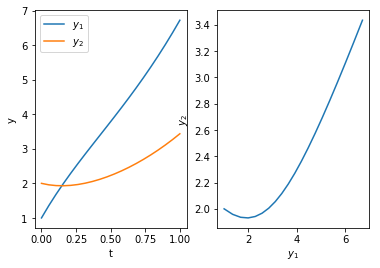

In [6]:
y_=np.zeros((nbp,2))
for k in range(nbp):
    y_[k,:]=scipy.linalg.expm(A*t_[k]).dot(y0).reshape(1,2)
plt.subplot(1,2,1)
plt.plot(t_,y_[:,0],label=r'$y_1$')
plt.plot(t_,y_[:,1],label=r'$y_2$')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.subplot(1,2,2)
plt.plot(y_[:,0],y_[:,1])
plt.xlabel(r'$y_1$')
plt.ylabel(r'$y_2$')


valeurs propres de la matrice [0.+1.j 0.-1.j]


Text(0,0.5,'$y_2$')

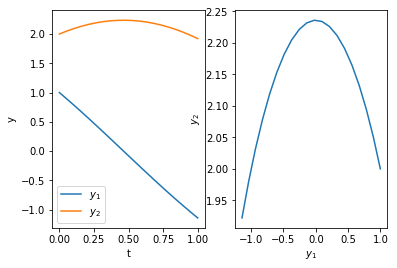

In [13]:
a_11,a_12, a_21, a_22=0,-1,1,0
y_1,y_2=1.,2
A =np.matrix([[a_11,a_12], [a_21, a_22]]) 
w,v=scipy.linalg.eig(A) # calcule les valeurs propres dans w et les vecteurs propres dans v
print ("valeurs propres de la matrice" ,w)
y0 =np.matrix([[y_1],[y_2]]) 
y_=np.zeros((nbp,2))
for k in range(nbp):
    y_[k,:]=scipy.linalg.expm(A*t_[k]).dot(y0).reshape(1,2)
plt.subplot(1,2,1)
plt.plot(t_,y_[:,0],label=r'$y_1$')
plt.plot(t_,y_[:,1],label=r'$y_2$')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.subplot(1,2,2)
plt.plot(y_[:,0],y_[:,1])
plt.xlabel(r'$y_1$')
plt.ylabel(r'$y_2$')


valeurs propres de la matrice [2.+0.j 2.+0.j]


Text(0,0.5,'$y_2$')

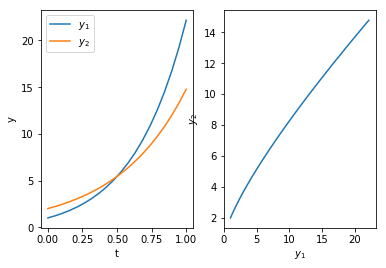

In [7]:
a_11,a_12, a_21, a_22=2,1,0,2
y_1,y_2=1.,2
A =np.matrix([[a_11,a_12], [a_21, a_22]]) 
w,v=scipy.linalg.eig(A) # calcule les valeurs propres dans w et les vecteurs propres dans v
print ("valeurs propres de la matrice" ,w)

y0 =np.matrix([[y_1],[y_2]]) 
y_=np.zeros((nbp,2))
for k in range(nbp):
    y_[k,:]=scipy.linalg.expm(A*t_[k]).dot(y0).reshape(1,2)
plt.subplot(1,2,1)
plt.plot(t_,y_[:,0],label=r'$y_1$')
plt.plot(t_,y_[:,1],label=r'$y_2$')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.subplot(1,2,2)
plt.plot(y_[:,0],y_[:,1])
plt.xlabel(r'$y_1$')
plt.ylabel(r'$y_2$')


## Exercice 2 -  Oscillateur amorti et forcé

On rappelle l'équation de l’oscillateur harmonique, de fréquence $\omega/(2\pi)$ et
d’amplitude $K$
$$\left\{\begin{array}{l}x''(t) + cx'(t) + \omega_0^2x(t)=K\cos(\omega t)\\
 x(0) = x_0 \\
 x'(0) = v_0
 \end{array}\right.
 $$
avec $c>0$.

L'équation différentielle du second ordre se transforme en un système différentiel d'ordre un
$$ \left\{\begin{array}{l}X'(t)=AX(t)+b(t)\\
X(0)=X_0 \end{array}\right.
$$
avec
$$X(t)=\begin{pmatrix} x(t)\\x'(t)\end{pmatrix},\quad X_0=\begin{pmatrix} x_0\\v_0\end{pmatrix}\quad A=\begin{pmatrix} 0 & 1\\ -\omega_0^2 & -c\end{pmatrix}\quad b(t)=\begin{pmatrix} 0\\K\cos(\omega t)\end{pmatrix}$$


### Première partie - cas homogène

On commence par étudier le système homogène 
$$\left\{\begin{array}{l}x''(t) + cx'(t) + \omega_0^2x(t)=0\\
 x(0) = x_0 \\
 x'(0) = v_0
 \end{array}\right.
 $$
On rappelle le champ de vecteur du système homogène associé $$X'(t)=AX(t).$$
Le code ci-dessous est un exemple pour vous montrer comment tracer le champ de vecteur.

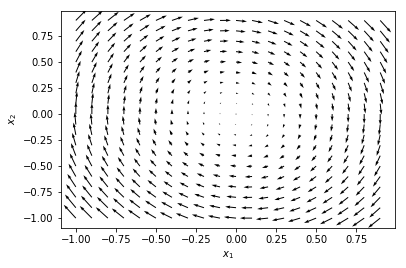

In [10]:
# Fixer les parametres
c        = .1
omega_0  = 1
w2       = omega_0**2

# Discrétiser les deux variables
x1min    = -1
x1max    = 1
dx1      = 0.1
x1       = np.arange(x1min,x1max,dx1)
x2min    = -1.
x2max    = 1
dx2      = 0.1
x2=np.arange(x2min,x2max,dx2)

# Calculer le champ de vecteur
XX1,XX2  = np.meshgrid(x1, x2)
U        = XX2
V        = -w2*XX1-c*XX2

# Plot la figure
plt.quiver(XX1,XX2,U,V)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

La solution de l'équation homogène se calcule grâce à l'exponentielle de matrice (déjà vu au TP précédent)
Dans la cellule suivante on superpose le champ de vecteur et les trajectoires.

valeurs propres de la matrice [-0.05+0.99874922j -0.05-0.99874922j]


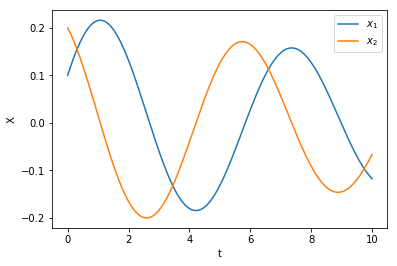

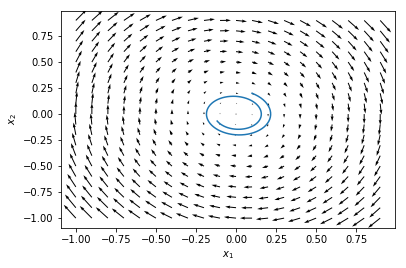

In [16]:
# Discrétiser l'intervalle t
nbp     = 200
t_0     = 0
t_1     = 10
t_      = np.linspace(t_0,t_1,nbp)

# condition initiale
x_0,v_0 = .1,.2
X0      = np.matrix([[x_0],[v_0]]) 

# la matrice A
A       = np.matrix([[0,1], [-w2, -c]]) 

# calcule les valeurs propres dans w et les vecteurs propres dans v
w,v     = scipy.linalg.eig(A) 
print ("valeurs propres de la matrice" ,w)

# Evaluer les valeurs du X à chaque l'instant t
X_      = np.zeros((nbp,2))
for k in range(nbp):
    X_[k,:]=scipy.linalg.expm(A*t_[k]).dot(X0).reshape(1,2)
    
# Plot les figures    
plt.figure(1)
plt.plot(t_,X_[:,0],label=r'$x_1$')
plt.plot(t_,X_[:,1],label=r'$x_2$')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.quiver(XX1,XX2,U,V)
plt.plot(X_[:,0],X_[:,1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

Question : modifier (un peu) le code ci-dessus pour mettre en évidence le comportement en temps long / asymptotique de la solution.

Réponse : on refait tourner le code ci-dessus en multipliant nbp et t_1 par 10 (ou 100). On voit clairement la convergence en temps long vers le point stationnaire (0,0) dans l'espace des phases.

valeurs propres de la matrice [-0.05+0.99874922j -0.05-0.99874922j]


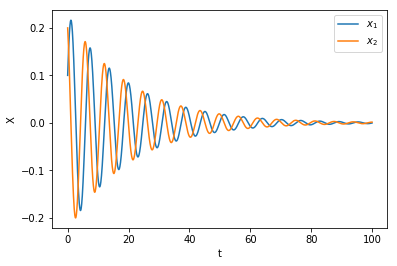

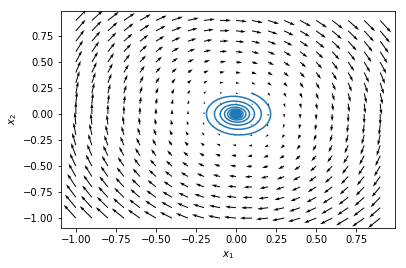

In [17]:
# Discrétiser l'intervalle t
nbp     = 2000
t_0     = 0
t_1     = 100
t_      = np.linspace(t_0,t_1,nbp)

# condition initiale
x_0,v_0 = .1,.2
X0      = np.matrix([[x_0],[v_0]]) 

# la matrice A
A       = np.matrix([[0,1], [-w2, -c]]) 

# calcule les valeurs propres dans w et les vecteurs propres dans v
w,v     = scipy.linalg.eig(A) 
print ("valeurs propres de la matrice" ,w)

# Evaluer les valeurs du X à chaque l'instant t
X_      = np.zeros((nbp,2))
for k in range(nbp):
    X_[k,:]=scipy.linalg.expm(A*t_[k]).dot(X0).reshape(1,2)
    
# Plot les figures    
plt.figure(1)
plt.plot(t_,X_[:,0],label=r'$x_1$')
plt.plot(t_,X_[:,1],label=r'$x_2$')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.quiver(XX1,XX2,U,V)
plt.plot(X_[:,0],X_[:,1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

Si on augmente la durée de la simulation on voit que la solution tend vers 0 quand t devient grand, le point (0,0) est un point d'équilibre asymptotiquement stable.

### Deuxième Partie - Avec le second membre

Une solution particulière de l'EDO se cherche sous la forme $$x_p(t)=a_p\cos(\omega t)+b_p\sin(\omega t).$$
Tous calculs faits (à faire à titre d'exercice), on trouve
$$   a_p=\frac{\alpha K}{\alpha^2+(c\omega)^2},\quad
    b_p=\frac{c\omega K}{\alpha^2+(c\omega)^2},\quad\mbox{avec }\alpha= \omega_0^2-\omega^2 $$
La solution particulière s'acrit sous forme vectorielle $$X_p(t)=\begin{pmatrix}x_p(t)\cr x_p'(t) \end{pmatrix}=\begin{pmatrix}a_p& b_p\cr b_p\omega&-a_p\omega \end{pmatrix}\begin{pmatrix}\cos(\omega t)\cr \sin(\omega t) \end{pmatrix}$$
La solution a la forme générale  $$ X(t)=X_p(t)+e^{At}\bar X,$$ dans laquelle on détermine $\bar X$ pour que $X(0)=X_0$, c'est-à-dire
$$\bar X=X_0-X_p(0)=\begin{pmatrix}x_0-a_p\cr v_0 -b_p\omega\end{pmatrix}$$


#### Question 1
Ecrire une fonction oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K) qui calcule la solution aux temps du vecteur t_.

In [20]:
def oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K):
    alpha = omega_0**2 - omega**2
    ap = alpha*K/(alpha**2+(c*omega)**2)
    bp = c*omega*K/(alpha**2+(c*omega)**2)
    
    A  = np.matrix([[0,1],[-omega_0**2,-c]])
    X_ = np.matrix([[x_0-ap],[v_0-bp*omega]])
    
    x_=[]
    v_=[]
    
    for t in t_:
        eA = scipy.linalg.expm(A*t)
        X = eA*X_
        x_.append(float(np.real(X[0][0]))+ap*math.cos(omega*t)+bp*math.sin(omega*t))
        v_.append(float(np.real(X[1][0]))+bp*omega*math.cos(omega*t)-ap*omega*math.sin(omega*t))
    return x_,v_

Tester la fonction pour $c=0.1$, $K=\omega=0$ pour retrouver les résultats du cas précédent

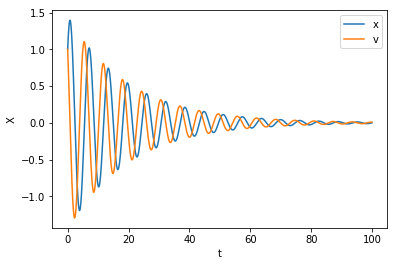

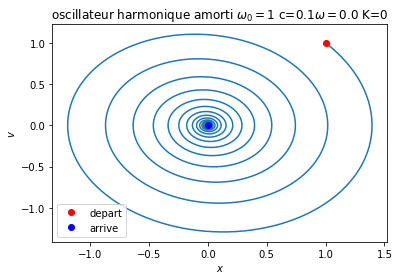

In [25]:
# Fixer les parametres
t_      = np.linspace(0,100,2000)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = .1
K       = 0
omega   = 0.

# Calculer les positions et les vitesses
x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrive')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique amorti $\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

Vérifiez en traçant le portrait de phase que vous retrouvez bien les différents comportements décrits dans le polycopié.

#### Question 2: cas avec excitation et frottement
Vérifier votre fonction avec $x_0=1$, $v_0=1$, $\omega_0=1$, $c=0.1$, $K=2$ et $\omega=5$. C'est aussi le cas avec
excitation et frottement(i.e $K>0$ et $c>0$).

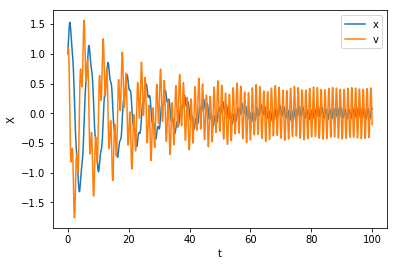

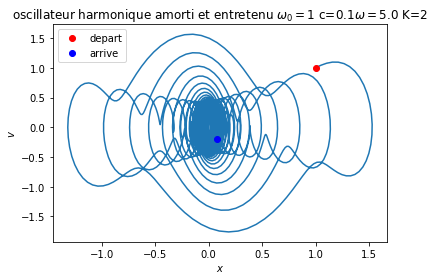

In [27]:
# Fixer les parametres
t_      = np.linspace(0,100,2000)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = .1
K       = 2
omega   = 5.

# Calculer les positions et les vitesses
x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrive')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique amorti et entretenu $\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

#### Questions 3: cas sans excitation et sans frottement 
Reprenez votre fonction avec $K = 0$ et $c = 0$, tout le reste ne change pas, tracer le portait de phase et les valeurs de x_ et t_ en fonction de $t$. On rappelle que la solution dans ce cas là est de la forme
$$ x(t) = x_0cos(\omega_0t)+\frac{v_0}{\omega_0}sin(\omega_0t)$$

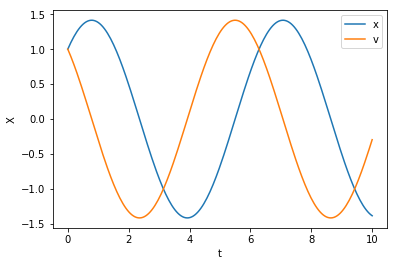

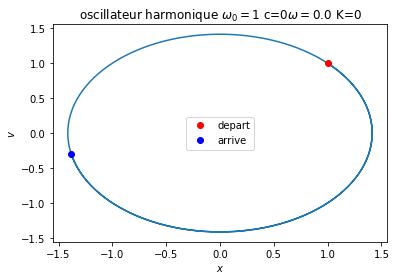

In [28]:
# Fixer les parametres
t_      = np.linspace(0,10,200)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = 0
K       = 0
omega   = 0.

# Calculer les positions et les vitesses
x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrive')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique $\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

#### Question 4: cas sans excitation et avec frottement
Trois cas possibles suivant la nature des racines de l’équation caractéristique $$\lambda^2 + c\lambda + \omega_0^2 = 0$$
Ici on remarque bien que $K=0$ et $c>0$

##### Question : cas $\lambda_1 \neq \lambda_2 \in \mathbb{R}$
Prenons par exemple $c = 3$, $\omega_0 = 1$,$x_0=1$, $v_0=1$ et $\omega=5$.
On voit que dans ce cas la solution tend vers le point stationnaire $(0.,0)$ dans l'espace des phases

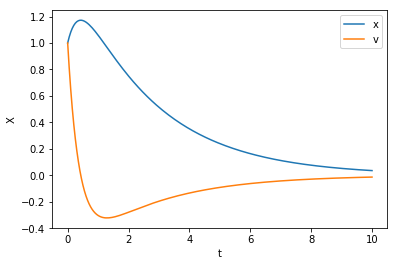

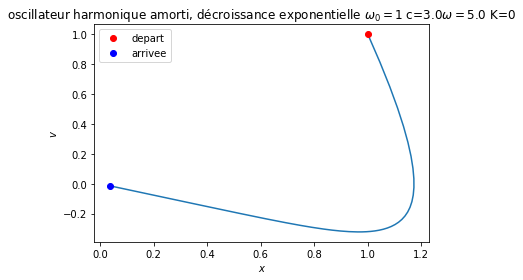

In [33]:
# Fixer les parametres
t_      = np.linspace(0,10,200)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = 3.
K       = 0
omega   = 5.

# Calculer les positions et les vitesses
x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrivee')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique amorti, décroissance exponentielle $\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

##### Question : cas $\lambda_1 \neq \lambda_2 \in \mathbb{C}$
Prenons par exemple $c = 1$, $\omega_0 = 1$,$x_0=1$, $v_0=1$ et $\omega=5$.
Là encore la solution tend vers le point stationnaire, mais en oscillant.

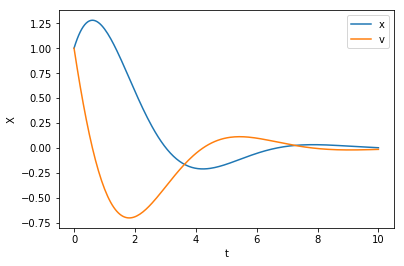

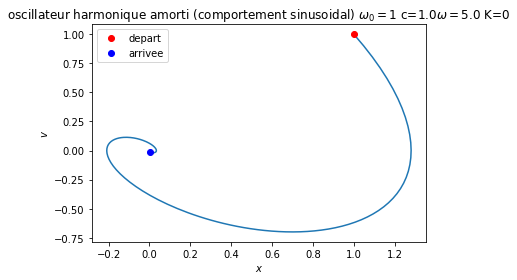

In [34]:
# Fixer les parametres
t_      = np.linspace(0,10,200)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = 1.
K       = 0
omega   = 5.

# Calculer les positions et les vitesses
x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrivee')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique amorti (comportement sinusoidal) $\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

##### Question : cas $\lambda_1 = \lambda_2$
Prenons par exemple $c = 2$, $\omega_0 = 1$,$x_0=1$, $v_0=1$ et $\omega=5$.
La solution ne se distingue pas qualitativement du premier cas, bien qu'elle contienne maintenant un terme polynomial en facteur de l'exponentielle.

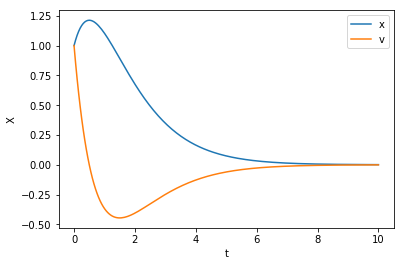

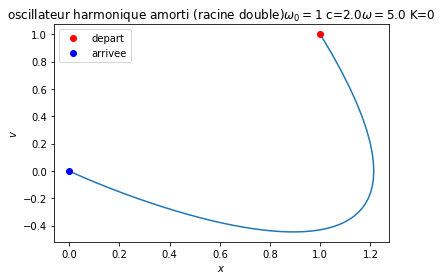

In [38]:
# Fixer les parametres
t_      = np.linspace(0,10,200)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = 2.
K       = 0
omega   = 5.

# Calculer les positions et les vitesses
x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrivee')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique amorti (racine double)$\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

#### Question 5: cas résonance avec frottement
Visualiser la solution pour 𝑐=1, 𝜔0=1,𝑥0=1, 𝑣0=1,  K=1 et 𝜔=𝜔0

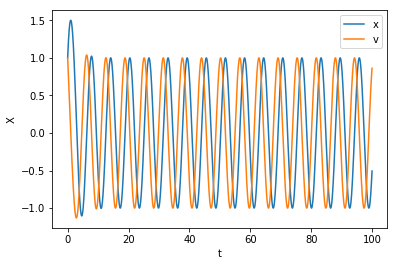

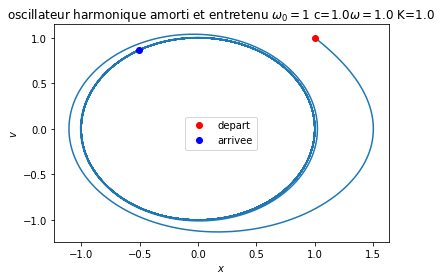

In [39]:
# Fixer les parametres
t_      = np.linspace(0,100,2000)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = 1.
K       = 1.
omega   = 1.

# Calculer les positions et les vitesses
x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrivee')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique amorti et entretenu avec la fréquence propre $\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

Dans ce régime, comme dans le cas $\omega\neq \omega_0$ d'ailleurs, au bout d'un certain temps le mouvement propre de l'oscillateur disparait à cause de l'aténuation, s'il n'y avait pas l'excitation extérieure il serait revenu à l'équilibre. Il ne reste donc plus que la composante périodique due à excitation extérieure.

#### Question 6: cas résonance sans frottement
Dans le cas où il y a une résonnance sans frottement, on sait d'après le poly que la solution est de la forme 
$$x(t)=(at+b)\sin(\omega t)+(dt+e)\cos(\omega t)$$
Les constantes $a$, $b$, $d$ et $e$ se déterminent en injectant cette solution dans le problème de Cauchy.<br>
L'EDO donne $$2 a \omega\cos(\omega t)-2d\omega\sin(\omega t)=K\cos(\omega t)$$
d'où $d=0$ et $a=\frac{K}{2\omega}$.<br>
Les conditions initiales donnent
$e=x_0$ et $b\omega=v_0$ d'où finalement
$$x(t)=\frac{Kt+v_0}{2\omega}\sin(\omega t)+x_0\cos(\omega t).$$
Programmer le calcul dans la fonction ci-dessous . Visualiser la solution pour $c=0$, $\omega_0=1$,$x_0=1$, $v_0=1$ et $\omega=\omega_0$.

In [49]:
def resonnance(t,omega,x0,v0,K):
    x=(K*t+2*v0)*math.sin(omega*t)/(2*omega)+x0*math.cos(omega*t)  #completer
    v=(K/(2*omega)-x0*omega)*math.sin(omega*t)+(K*t+2*v0)*math.cos(omega*t)/2
    return x,v

On vérifie que l'amplitude de la solution dans l'espace des phases croît linéairement en temps. C'est le phénomène de résonnance.

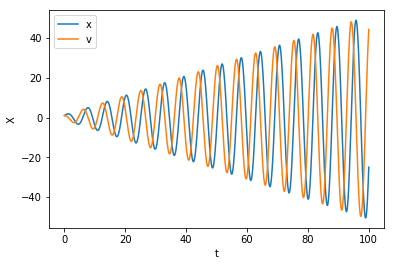

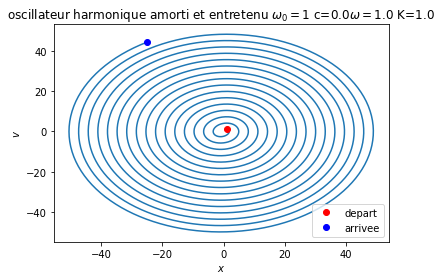

In [52]:
# Fixer les parametres
t_      = np.linspace(0,100,2000)
x_0     = 1
v_0     = 1
omega_0 = 1
c       = 0.
K       = 1.
omega   = 1.

# Calculer les positions et les vitesses
sol=[resonnance(t,omega,x_0,v_0,K) for t in t_]
x_=[s[0] for s in sol]
v_=[s[1] for s in sol]

# Tracer les figures
plt.figure(1)
plt.plot(t_,x_,label=r'x')
plt.plot(t_,v_,label=r'v')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()

plt.figure(2)
plt.plot(x_,v_)
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrivee')
plt.legend()
xlim=[min(x_),max(x_)]
ylim=[min(v_),max(v_)]
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.title("oscillateur harmonique amorti et entretenu $\omega_0=$"+str(omega_0)+ " c="+str(c)+"$\omega=$"+str(omega)+" K="+str(K))
plt.show()

### Question 6: l'intégrateur odeint

Dans ce TP on s'intéresse à des ODE dont on peut calculer explicitement la solution, mais ça ne sera pas toujours le cas. Et même, on n'est pas à labri d'une erreur de calcul de la dite solution ou d'une erreur de programmation.
Le parachute c'est le "solveur" d'équations différentielles odeint de la librairie scipy.integrate, qui va calculer une solution numérique de notre équation différentielle en utilisant la méthode numérique la plus adaptée (en gros, les auteurs de la librairie ont suivi avec succès une version avancée de l'UE 3M326) 

Si vous lisez la documentation scipy de ce solveur, vous trouverez la syntaxe suivante :

$$scipy.integrate.odeint(func,y0,t,args=(),Dfun=None,col\_deriv=0,full\_output=0,mi=None,mu=None,rtol=None,atol=None,tcrit=None,h0=0.0,hmax=0.0,hmin=0.0,ixpr=0,mxstep=0,mxhnil=0,mxordn=12,mxords=5,printmessg=0)$$

En effet, la fonction odeint accepte de nombreux arguments optionnels, qui ne sont pas obligatoires pour une utilisation de base et dont on ne s'occupera pas ici. 
Pour utiliser avec succès leur librairie, il faut
<UL>
<li> mettre son problème de Cauchy sous la forme (pas si) canonique (que ça)
$$\left\{\begin{array}{l}Y'(t)=F(Y(t),t,p)\\
 Y(t_0) = Y_0\end{array}\right.
 $$
<li> identifier et programmer la fonction $F(Y,t,p)$ où $p$ est un tupple contenant les paramètres éventuels. Attention de respecter l'ordre des arguments, qui n'est pas celui du cours.
<li> définir t\_0, Y\_0, la liste t\_ des temps discrets où on veut calculer la solution, et les paramètres éventuels
<li> appeler le solveur odeint
</UL>
L'exemple simple
$$\left\{\begin{array}{l}Y'(t)=AY(t), \quad\mbox{avec } A=\begin{pmatrix}-2&1\cr 1 &-4\end{pmatrix}\\
 Y(0) = (2,1)^T\end{array}\right.
 $$
est traité ci-dessous


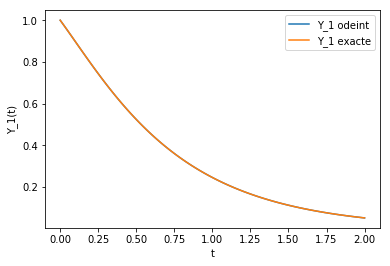

In [53]:
A =np.array([[-2.,1.], [1.,-4.]]) # la matrice
#La fonction second membre en respectant l'ordre des arguments
def second_membre(Y,t,A):
    Z=A.dot(Y)
    return Z
def sol_exacte(Y0,t,A):
    Am=np.matrix(A)
    Z=scipy.linalg.expm(Am*t).dot(Y0)
    return Z
 
Y0 =np.array([1.,1.]) # la condition initiale
t_ =np.linspace(0,2.,100)

Y=scipy.integrate.odeint(second_membre, Y0, t_,args=(A,))
Ye=[sol_exacte(Y0,t,A) for t in t_] #vecteur de la solution exacte sur le vecteur discretisé t_
x_=[] 
xe_=[]
for y,ye in zip(Y,Ye):
    x_.append(y[0])
    xe_.append(ye[0])
    
plt.plot(t_,x_,label='Y_1 odeint')
plt.plot(t_,xe_,label='Y_1 exacte')
plt.xlabel('t')
plt.ylabel('Y_1(t)')
plt.legend()
plt.show()

Deux remarques importantes:
<OL><LI>
Lisez attentivement l'exemple ci-dessus et remarquez bien la manière dont on calcule les produits matrice x vecteur.
Si la matrice et le vecteur sont tous les deux des objets de type numpy.matrix, l'opération * effectue bien le produit mathématique matrice x vecteur. Si l'un des deux termes est un simple numpy.array (comme ci-dessus), il faut utiliser la commande numpy.dot pour faire une multiplication algébrique. l'opérateur * sur les objets numpy.array effectue la multiplication "composante par composante" si elle a un sens.
<LI> le solveur odeint peut manipuler des listes et des tableaux à une seule dimension seulement.
</OL>

Vérifier la solution calculée par oscillateur\_aten\_force à l’aide de l’intégrateur odeint

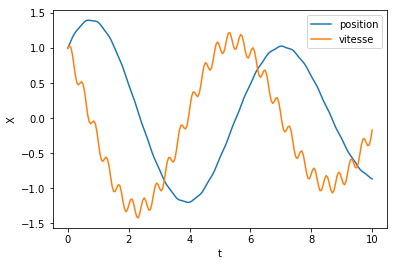

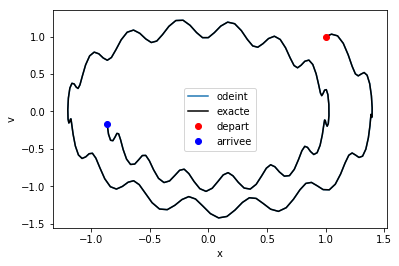

In [54]:
#votre solution ci-dessous
def ode_oscillateur_aten_force(X,t,omega_0,c,omega,K):
    x = X[0]
    v = X[1]
    dx = v
    dv = -x*omega_0**2-c*v+K*math.cos(omega*t)
    return [dx,dv]

# Condition initiale
X_0     = np.array([1.,1.])
t_      = np.linspace(0,10,200)
omega_0 = 1
c       = .1
omega   = 5*math.pi
K       = 2

# Calcule avec le solveur
sol = scipy.integrate.odeint(ode_oscillateur_aten_force, X_0, t_, args=(omega_0,c,omega,K))

x_,v_   = oscillateur_aten_force(t_,x_0,v_0,omega_0,c,omega,K)

# Tracer les figures
plt.figure(1)
plt.plot(t_,sol[:, 0],label='position')
plt.plot(t_,sol[:, 1],label='vitesse')
plt.xlabel('t')
plt.ylabel('X')
plt.legend()
plt.draw()

plt.figure(2)
plt.plot(sol[:,0],sol[:,1],label='odeint')
plt.plot(x_,v_,'k',label='exacte')
plt.xlabel('x')
plt.ylabel('v')
plt.plot(x_0,v_0,'or',label='depart')
plt.plot(x_[-1],v_[-1],'ob',label='arrivee')
plt.legend()
plt.show()